# Only with Diatrend method, showing the box plot result across methods 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind

In [3]:
baseline = [28.3984657, 21.8230374, 20.81636577, 23.40095643, 20.78556154,
27.53613862,18.80877713,25.45234166,24.20113517,21.893413,24.2492663,21.14835806]

martinsson = [
    21.35247969, 17.05835874, 16.03832975, 18.61808816, 17.99710762, 20.85332033,
    16.09543246, 21.24862963, 21.63385447, 18.43506251, 20.27293094, 16.69982643
]

vanDoorn = [
    21.64184379, 17.04615697, 16.35516263, 19.02849053, 18.09766005, 21.10796599,
    17.02367811, 22.11910653, 21.70599482, 18.35218433, 20.74022272, 17.18041202
]

Deng = [
    0.1906, 0.1838, 0.161, 0.1908, 0.2201, 0.2089,
    0.2235, 0.166, 0.1715, 0.2149, 0.2181, 0.1712
]
Deng = [value * 100 for value in Deng]

Lee = [
    19.87, 16.98, 21.42, 18.56, 18.32, 23.15,
    22.77, 22.78, 18.18, 21.6, 17.1, 16.67
]


Rabby = [
    22.721628, 17.686695, 17.21854, 20.015371, 18.48805, 22.425997,
    16.24905, 22.743517, 22.229399, 18.826487, 20.916145, 17.832567

]

Li = [
    21.346598, 17.790308, 16.03872, 18.493727, 18.988787, 21.273155,
    15.557382, 21.93606, 22.629877, 18.820103, 21.452707, 17.38894
]

In [7]:
# Cross T-test
# List of all methods
methods = {
    'baseline': baseline,
    'martinsson': martinsson,
    'vanDoorn': vanDoorn,
    'Deng': Deng,
    'Lee': Lee,
    'Rabby': Rabby,
    'Li': Li
}
# Initialize DataFrames to store the p-values and significance
p_values = pd.DataFrame(index=methods.keys(), columns=methods.keys())
significance = pd.DataFrame(index=methods.keys(), columns=methods.keys())

# Perform pairwise t-tests and store the p-values and significance
alpha = 0.05
for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            _, p_value = ttest_ind(methods[method1], methods[method2])
            p_values.loc[method1, method2] = p_value
            significance.loc[method1, method2] = 'Yes' if p_value < alpha else 'No'
        else:
            p_values.loc[method1, method2] = np.nan  # Fill diagonal with NaN
            significance.loc[method1, method2] = 'N/A'

# Print the p-values table
print("P-values:")
print(p_values)

# Print the significance table
print("\nSignificance (Yes/No):")
print(significance)


P-values:
            baseline martinsson  vanDoorn      Deng       Lee     Rabby  \
baseline         NaN   0.000371  0.000834  0.001459  0.004834  0.004293   
martinsson  0.000371        NaN  0.699276  0.602767  0.335186  0.327588   
vanDoorn    0.000834   0.699276       NaN  0.881418  0.540909  0.535449   
Deng        0.001459   0.602767  0.881418       NaN  0.649814  0.646482   
Lee         0.004834   0.335186  0.540909  0.649814       NaN  0.996889   
Rabby       0.004293   0.327588  0.535449  0.646482  0.996889       NaN   
Li           0.00155    0.62978  0.906451  0.977728  0.635915  0.632518   

                  Li  
baseline     0.00155  
martinsson   0.62978  
vanDoorn    0.906451  
Deng        0.977728  
Lee         0.635915  
Rabby       0.632518  
Li               NaN  

Significance (Yes/No):
           baseline martinsson vanDoorn Deng  Lee Rabby   Li
baseline        N/A        Yes      Yes  Yes  Yes   Yes  Yes
martinsson      Yes        N/A       No   No   No    No   N

In [2]:
# Combine all data into a single DataFrame for seaborn
data = {
    'Model': 
             ['Martinsson'] * len(martinsson) +
             ['vanDoorn'] * len(vanDoorn) +
             ['Deng'] * len(Deng) +
             ['Lee'] * len(Lee) +
             ['Rabby'] * len(Rabby) +
             ['Li'] * len(Li),
    'RMSE': martinsson + vanDoorn + Deng + Lee + Rabby + Li
}

df = pd.DataFrame(data)

# Paper-reported average RMSE for each method
paper_reported_rmse = {
    'Martinsson': 18.87,
    'vanDoorn': 18.828,
    'Deng': 19.08,
    'Rabby': 19.28,
    'Li': 18.57
}


# Calculate the baseline average
baseline_avg = sum(baseline) / len(baseline)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='RMSE', data=df, palette='Set2', linewidth=1.3)
plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('RMSE Distribution Across Methods', fontsize=16)
plt.grid(alpha=0.5)

# Customize x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal line segments for paper-reported averages with triangles
for i, model in enumerate(df['Model'].unique()):
    if model in paper_reported_rmse:
        avg_rmse = paper_reported_rmse[model]
        plt.plot([i - 0.4, i + 0.4], [avg_rmse, avg_rmse], 'r--', marker='^', markersize=8, label='Reported Avg' if i == 0 else "")

# Add a dotted line for the baseline average
plt.hlines(y=baseline_avg, xmin=-0.5, xmax=len(df['Model'].unique()) - 0.5, colors='blue', linestyles='dotted', label='Baseline Avg')

# Add a custom legend for the dashed and dotted lines
legend_elements = [
    Line2D([0], [0], color='red', lw=2, linestyle='dashed', marker='^', markersize=8, label='Reported Avg'),
    Line2D([0], [0], color='blue', lw=2, linestyle='dotted', label='Baseline Avg')
]
plt.legend(handles=legend_elements, fontsize=14)

plt.show()

NameError: name 'martinsson' is not defined

## Boxes on OhioT1DM

In [3]:
excel_file_path = "./result_final.csv"
diatrend_df = pd.read_csv(excel_file_path)
diatrend_df.head()

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,Rabby_retrained,Li_retrained,Rabby_crosscheck,Li_crosscheck,baseline
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,22.721628,21.346598,22.721628,21.830528,26.662815
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,17.686695,17.790308,17.686695,18.157267,23.247402
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,17.218540,16.038720,17.218540,16.875702,23.262571
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,20.015371,18.493727,20.015371,18.869516,28.477447
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,18.488050,18.988787,18.488050,19.197340,20.256378


In [4]:
# Retrained_result
retrained_result = diatrend_df[["Dataset", "SubjectID", "baseline", "Martinsson_retrained", "vanDoorn_retrained", "Deng_retrained", "Lee_retrained", "Rabby_retrained", "Li_retrained"]].copy()



In [5]:
baseline_avg = retrained_result["baseline"].mean()
baseline_avg

26.06167411966659

In [15]:
# Filter the dataframe to only include rows where Dataset is 'OhioT1DM'
ohiot1dm_df = retrained_result[retrained_result['Dataset'] == 'DiaTrend']
ohiot1dm_df['baseline'].mean()

28.721227738301884

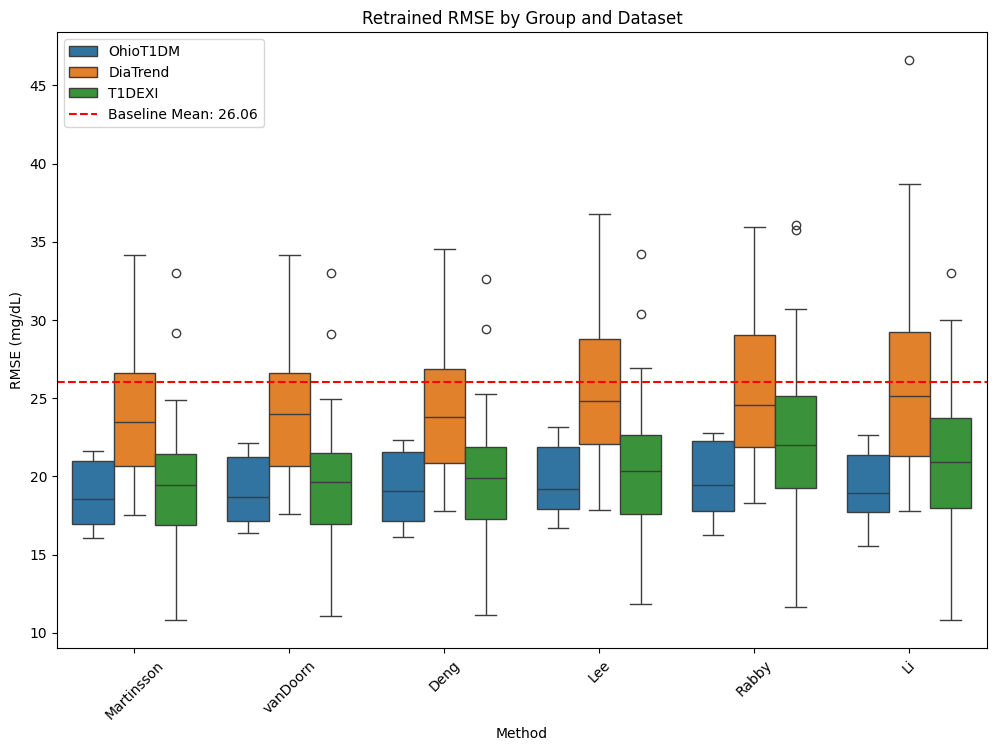

In [6]:
melted_df = retrained_result.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# Calculate the average of the baseline across the entire dataset
baseline_mean = retrained_result['baseline'].mean()

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Value', hue='Dataset', data=melted_df)
plt.title('Retrained RMSE by Group and Dataset')
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.ylabel('RMSE (mg/dL)')
plt.legend(title='Dataset')

# Add a dashed line for the average baseline
plt.axhline(y=baseline_mean, color='r', linestyle='--', linewidth=1.5, label=f'Baseline Mean: {baseline_mean:.2f}')
plt.legend()

plt.show()

In [8]:
group_means = melted_df[melted_df['Dataset'] == 'DiaTrend'].groupby('Group')['Value'].mean()

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_78566/4078934620.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_78566/4078934620.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_78566/4078934620.py:43: U

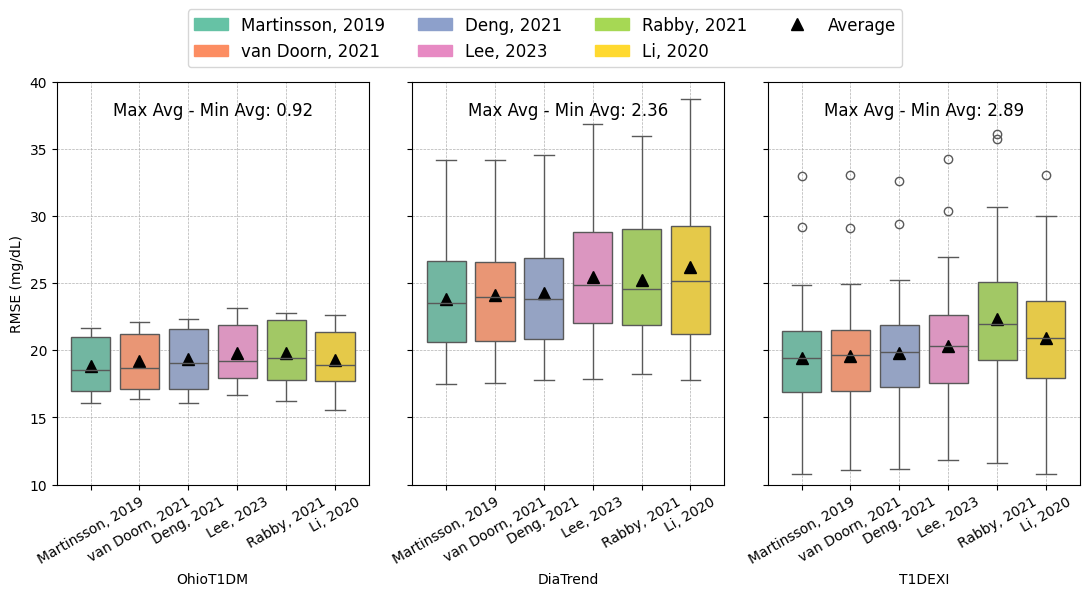

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Mapping of old method names to new method names
method_name_mapping = {
    'Martinsson': 'Martinsson, 2019',
    'vanDoorn': 'van Doorn, 2021',
    'Deng': 'Deng, 2021',
    'Lee': 'Lee, 2023',
    'Rabby': 'Rabby, 2021',
    'Li': 'Li, 2020'
}

# Paper-reported average RMSE for each method
paper_reported_rmse = {
    'Martinsson': 18.87,
    'vanDoorn': 18.828,
    'Deng': 19.08,
    'Rabby': 19.28,
    'Li': 18.57
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = retrained_result.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# Apply the method name mapping
melted_df['Group'] = melted_df['Group'].map(method_name_mapping)

# Calculate the average of the baseline by dataset
baseline_means = retrained_result.groupby('Dataset')['baseline'].mean()

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(11, 6), sharey=True)

# Define the datasets
datasets = ['OhioT1DM', 'DiaTrend', 'T1DEXI']

# Plot each dataset in a separate subplot
for i, dataset in enumerate(datasets):
    sns.boxplot(x='Group', y='Value', hue='Group', data=melted_df[melted_df['Dataset'] == dataset], ax=axes[i], palette='Set2', dodge=False)
    axes[i].set_xlabel(dataset)
    axes[i].set_ylabel('RMSE (mg/dL)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
    
    # Add a dashed line for the average baseline by dataset
    baseline_mean = baseline_means[dataset]
    # axes[i].axhline(y=baseline_mean, color='r', linestyle='--', linewidth=1.5, label=f'Baseline Mean: {baseline_mean:.2f}')
    axes[i].legend().remove()  # Remove individual legends
    
    # Annotate the average of each box with a triangle
    group_means = melted_df[melted_df['Dataset'] == dataset].groupby('Group')['Value'].mean()
    ordered_group_means = group_means.reindex(method_name_mapping.values())
    for j, group in enumerate(ordered_group_means.index):
        axes[i].plot(j, ordered_group_means[group], marker='^', color='black', markersize=8)
    
    # Calculate and annotate the difference between max average and min average
    max_avg = ordered_group_means.max()
    min_avg = ordered_group_means.min()
    diff_avg = max_avg - min_avg
    axes[i].text(0.5, 0.95, f'Max Avg - Min Avg: {diff_avg:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center')
    
    # Add light grid
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the y-axis range to be the same for all subplots
axes[0].set_ylim(10, 40)

# Create custom legend
# Mapping of old method names to new method names
method_name_mapping = {
    'Martinsson': 'Martinsson, 2019',
    'vanDoorn': 'van Doorn, 2021',
    'Deng': 'Deng, 2021',
    'Lee': 'Lee, 2023',
    'Rabby': 'Rabby, 2021',
    'Li': 'Li, 2020'
}
handles = [
    Patch(color=sns.color_palette('Set2')[0], label='Martinsson, 2019'),
    Patch(color=sns.color_palette('Set2')[1], label='van Doorn, 2021'),
    Patch(color=sns.color_palette('Set2')[2], label='Deng, 2021'),
    Patch(color=sns.color_palette('Set2')[3], label='Lee, 2023'),
    Patch(color=sns.color_palette('Set2')[4], label='Rabby, 2021'),
    Patch(color=sns.color_palette('Set2')[5], label='Li, 2020'),
    # Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Baseline Mean'),
    Line2D([0], [0], marker='^', color='black', markersize=8, label='Average', linestyle='None')
]

fig.legend(handles=handles, loc='upper center', ncol=4, fontsize=12, bbox_to_anchor=(0.5, 1.0))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
# plt.suptitle('Retrained RMSE by Dataset and Method', fontsize=16, y=1.05)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_78566/1091726692.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_78566/1091726692.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)
/var/

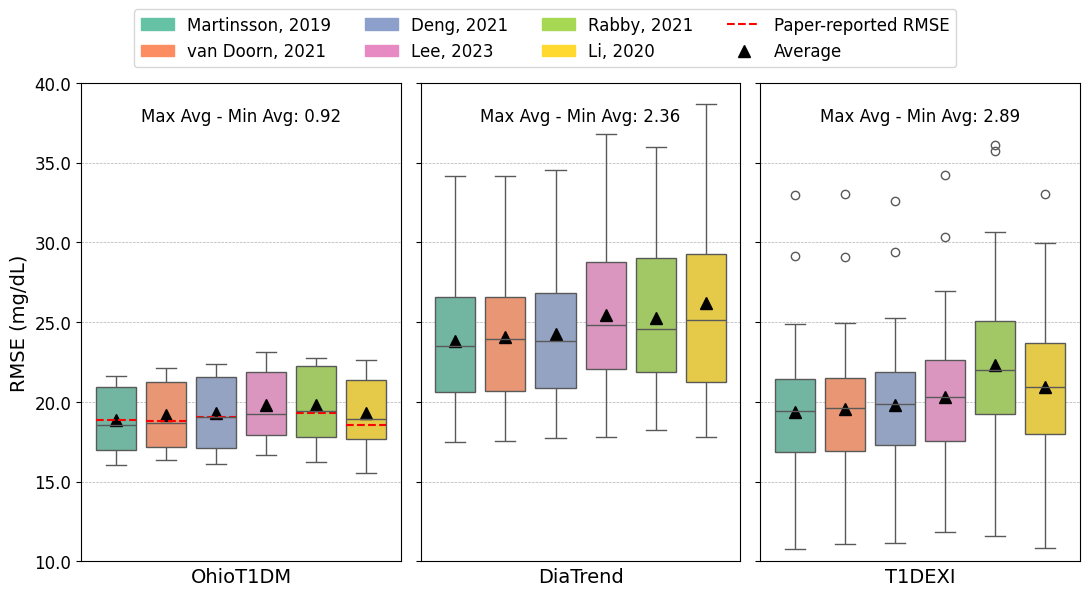

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Mapping of old method names to new method names
method_name_mapping = {
    'Martinsson': 'Martinsson, 2019',
    'vanDoorn': 'van Doorn, 2021',
    'Deng': 'Deng, 2021',
    'Lee': 'Lee, 2023',
    'Rabby': 'Rabby, 2021',
    'Li': 'Li, 2020'
}

# Paper-reported average RMSE for each method
paper_reported_rmse = {
    'Martinsson': 18.87,
    'vanDoorn': 18.828,
    'Deng': 19.08,
    'Lee': -1,
    'Rabby': 19.28,
    'Li': 18.57
}

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = retrained_result.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# Apply the method name mapping
melted_df['Group'] = melted_df['Group'].map(method_name_mapping)

# Calculate the average of the baseline by dataset
baseline_means = retrained_result.groupby('Dataset')['baseline'].mean()

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(11, 6), sharey=True)

# Define the datasets
datasets = ['OhioT1DM', 'DiaTrend', 'T1DEXI']

# Plot each dataset in a separate subplot
for i, dataset in enumerate(datasets):
    sns.boxplot(x='Group', y='Value', hue='Group', data=melted_df[melted_df['Dataset'] == dataset], ax=axes[i], palette='Set2', dodge=False)
    axes[i].set_xlabel(dataset, fontsize=14)
    axes[i].set_ylabel('RMSE (mg/dL)', fontsize=14)
    # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels
    axes[i].set_xticks([])
    
    
    # Add a dashed line for the average baseline by dataset
    baseline_mean = baseline_means[dataset]
    # axes[i].axhline(y=baseline_mean, color='r', linestyle='--', linewidth=1.5, label=f'Baseline Mean: {baseline_mean:.2f}')
    axes[i].legend().remove()  # Remove individual legends
    
    # Annotate the average of each box with a triangle
    group_means = melted_df[melted_df['Dataset'] == dataset].groupby('Group')['Value'].mean()
    ordered_group_means = group_means.reindex(method_name_mapping.values())
    for j, group in enumerate(ordered_group_means.index):
        axes[i].plot(j, ordered_group_means[group], marker='^', color='black', markersize=8)
    
    # Calculate and annotate the difference between max average and min average
    max_avg = ordered_group_means.max()
    min_avg = ordered_group_means.min()
    diff_avg = max_avg - min_avg
    axes[i].text(0.5, 0.95, f'Max Avg - Min Avg: {diff_avg:.2f}', transform=axes[i].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='center')
    
    # Add light grid
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Add paper-reported RMSE as red dashed segments to the first subfigure
for j, (method, rmse) in enumerate(paper_reported_rmse.items()):
    axes[0].plot([j - 0.4, j + 0.4], [rmse, rmse], 'r--', linewidth=1.5)

# Set the y-axis range to be the same for all subplots
axes[0].set_ylim(10, 40)
for ax in axes:
    ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Create custom legend
handles = [
    Patch(color=sns.color_palette('Set2')[0], label='Martinsson, 2019'),
    Patch(color=sns.color_palette('Set2')[1], label='van Doorn, 2021'),
    Patch(color=sns.color_palette('Set2')[2], label='Deng, 2021'),
    Patch(color=sns.color_palette('Set2')[3], label='Lee, 2023'),
    Patch(color=sns.color_palette('Set2')[4], label='Rabby, 2021'),
    Patch(color=sns.color_palette('Set2')[5], label='Li, 2020'),
    Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Paper-reported RMSE'),
    Line2D([0], [0], marker='^', color='black', markersize=8, label='Average', linestyle='None')
]

fig.legend(handles=handles, loc='upper center', ncol=4, fontsize=12, bbox_to_anchor=(0.5, 1.0))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
# plt.suptitle('Retrained RMSE by Dataset and Method', fontsize=16, y=1.05)
plt.show()

C:\Users\baiyi\AppData\Local\Temp\ipykernel_25180\1416181281.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=melted_df, palette='Set2', linewidth=1.3)


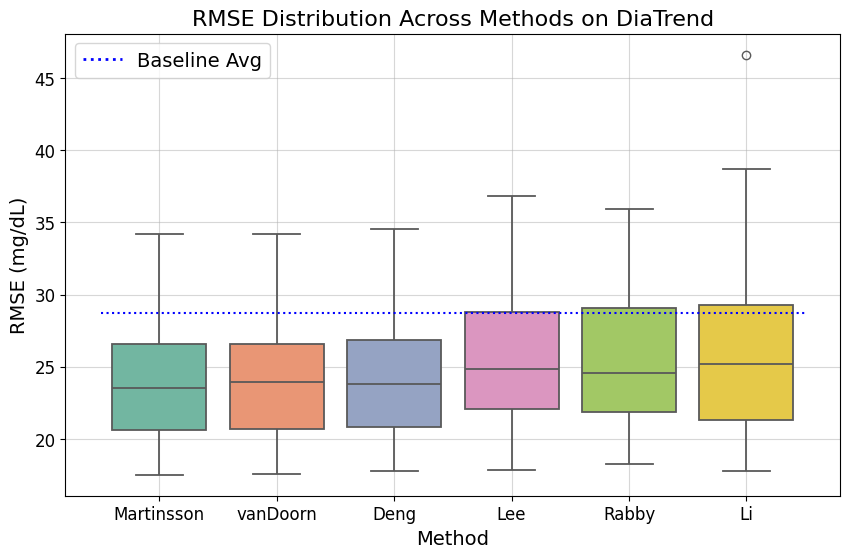

In [7]:
diatrend_df = retrained_result[retrained_result['Dataset'] == 'DiaTrend']

# Melt the dataframe to long format
melted_df = diatrend_df.melt(id_vars='Dataset', 
                             value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                         'Lee_retrained', 'Rabby_retrained', 'Li_retrained'],
                             var_name='Group', 
                             value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# Calculate the baseline average for the DiaTrend dataset
baseline_avg = diatrend_df['baseline'].mean()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=melted_df, palette='Set2', linewidth=1.3)
plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('RMSE Distribution Across Methods on DiaTrend', fontsize=16)
plt.grid(alpha=0.5)

# Customize x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a dotted line for the baseline average
plt.hlines(y=baseline_avg, xmin=-0.5, xmax=len(melted_df['Group'].unique()) - 0.5, colors='blue', linestyles='dotted', label='Baseline Avg')

# Add a custom legend for the dotted line
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, linestyle='dotted', label='Baseline Avg')
]
plt.legend(handles=legend_elements, fontsize=14)

plt.show()

In [8]:
# Filter the dataframe for the DiaTrend dataset
diatrend_df = retrained_result[retrained_result['Dataset'] == 'DiaTrend']

# Melt the dataframe to long format
melted_df = diatrend_df.melt(id_vars='Dataset', 
                             value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                         'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline'],
                             var_name='Group', 
                             value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df['Group'] = melted_df['Group'].str.replace('_retrained', '')

# List of all methods
methods = melted_df['Group'].unique()

# Initialize DataFrames to store the p-values and significance
p_values = pd.DataFrame(index=methods, columns=methods)
significance = pd.DataFrame(index=methods, columns=methods)

# Perform pairwise t-tests and store the p-values and significance
alpha = 0.05
for method1 in methods:
    for method2 in methods:
        if method1 != method2:
            values1 = melted_df[melted_df['Group'] == method1]['Value']
            values2 = melted_df[melted_df['Group'] == method2]['Value']
            _, p_value = ttest_ind(values1, values2)
            p_values.loc[method1, method2] = p_value
            significance.loc[method1, method2] = 'Yes' if p_value < alpha else 'No'
        else:
            p_values.loc[method1, method2] = np.nan  # Fill diagonal with NaN
            significance.loc[method1, method2] = 'N/A'

# Print the p-values table
print("P-values:")
print(p_values)

# Print the significance table
print("\nSignificance (Yes/No):")
print(significance)

P-values:
           Martinsson  vanDoorn      Deng       Lee     Rabby        Li  \
Martinsson        NaN  0.762175  0.611898  0.054154  0.096594  0.018578   
vanDoorn     0.762175       NaN  0.836594  0.097431  0.163895  0.032816   
Deng         0.611898  0.836594       NaN  0.142167   0.22912  0.047858   
Lee          0.054154  0.097431  0.142167       NaN  0.806062  0.463081   
Rabby        0.096594  0.163895   0.22912  0.806062       NaN  0.347475   
Li           0.018578  0.032816  0.047858  0.463081  0.347475       NaN   
baseline          0.0  0.000001  0.000003  0.000934  0.000448  0.026199   

            baseline  
Martinsson       0.0  
vanDoorn    0.000001  
Deng        0.000003  
Lee         0.000934  
Rabby       0.000448  
Li          0.026199  
baseline         NaN  

Significance (Yes/No):
           Martinsson vanDoorn Deng  Lee Rabby   Li baseline
Martinsson        N/A       No   No   No    No  Yes      Yes
vanDoorn           No      N/A   No   No    No  Yes      Ye

C:\Users\baiyi\AppData\Local\Temp\ipykernel_25180\2430144841.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=melted_df_t1dexi, palette='Set2', linewidth=1.3)


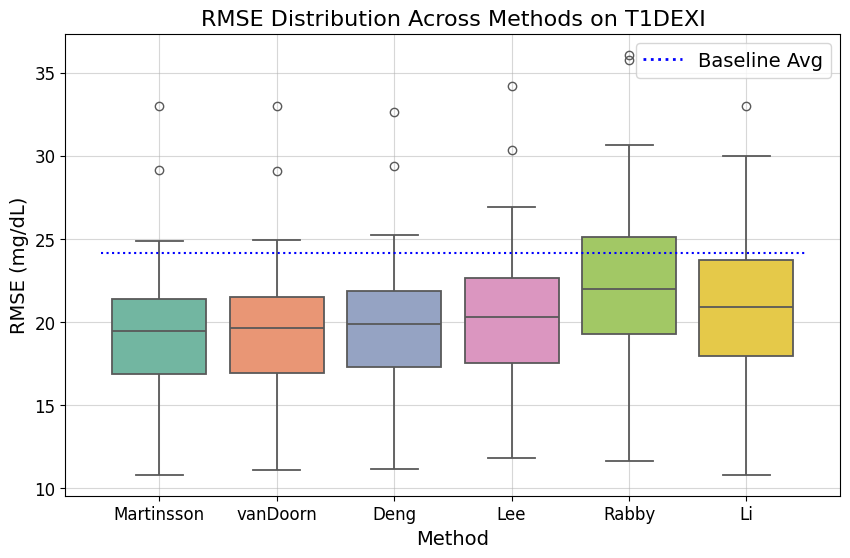

In [10]:
# Plot for T1DEXI dataset
t1dexi_df = retrained_result[retrained_result['Dataset'] == 'T1DEXI']

# Melt the dataframe to long format
melted_df_t1dexi = t1dexi_df.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df_t1dexi['Group'] = melted_df_t1dexi['Group'].str.replace('_retrained', '')

# Calculate the baseline average for the T1DEXI dataset
baseline_avg_t1dexi = t1dexi_df['baseline'].mean()

# Create the box plot for T1DEXI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=melted_df_t1dexi, palette='Set2', linewidth=1.3)
plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE (mg/dL)', fontsize=14)
plt.title('RMSE Distribution Across Methods on T1DEXI', fontsize=16)
plt.grid(alpha=0.5)

# Customize x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a dotted line for the baseline average
plt.hlines(y=baseline_avg_t1dexi, xmin=-0.5, xmax=len(melted_df_t1dexi['Group'].unique()) - 0.5, colors='blue', linestyles='dotted', label='Baseline Avg')

# Add a custom legend for the dotted line
legend_elements_t1dexi = [
    Line2D([0], [0], color='blue', lw=2, linestyle='dotted', label='Baseline Avg')
]
plt.legend(handles=legend_elements_t1dexi, fontsize=14)

plt.show()

In [11]:
# Filter the dataframe for the T1DEXI dataset
t1dexi_df = retrained_result[retrained_result['Dataset'] == 'T1DEXI']

# Melt the dataframe to long format
melted_df_t1dexi = t1dexi_df.melt(id_vars='Dataset', 
                                  value_vars=['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 
                                              'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline'],
                                  var_name='Group', 
                                  value_name='Value')

# Remove the '_retrained' suffix from the 'Group' column
melted_df_t1dexi['Group'] = melted_df_t1dexi['Group'].str.replace('_retrained', '')

# List of all methods
methods_t1dexi = melted_df_t1dexi['Group'].unique()

# Initialize DataFrames to store the p-values and significance
p_values_t1dexi = pd.DataFrame(index=methods_t1dexi, columns=methods_t1dexi)
significance_t1dexi = pd.DataFrame(index=methods_t1dexi, columns=methods_t1dexi)

# Perform pairwise t-tests and store the p-values and significance
alpha = 0.05
for method1 in methods_t1dexi:
    for method2 in methods_t1dexi:
        if method1 != method2:
            values1 = melted_df_t1dexi[melted_df_t1dexi['Group'] == method1]['Value']
            values2 = melted_df_t1dexi[melted_df_t1dexi['Group'] == method2]['Value']
            _, p_value = ttest_ind(values1, values2)
            p_values_t1dexi.loc[method1, method2] = p_value
            significance_t1dexi.loc[method1, method2] = 'Yes' if p_value < alpha else 'No'
        else:
            p_values_t1dexi.loc[method1, method2] = np.nan  # Fill diagonal with NaN
            significance_t1dexi.loc[method1, method2] = 'N/A'

# Print the p-values table
print("P-values for T1DEXI:")
print(p_values_t1dexi)

# Print the significance table
print("\nSignificance (Yes/No) for T1DEXI:")
print(significance_t1dexi)

P-values for T1DEXI:
           Martinsson  vanDoorn      Deng       Lee     Rabby        Li  \
Martinsson        NaN  0.818272  0.551625  0.187987  0.000186  0.038349   
vanDoorn     0.818272       NaN  0.711214  0.268377  0.000349  0.060045   
Deng         0.551625  0.711214       NaN  0.454493  0.001104  0.123178   
Lee          0.187987  0.268377  0.454493       NaN  0.010855  0.416072   
Rabby        0.000186  0.000349  0.001104  0.010855       NaN  0.086719   
Li           0.038349  0.060045  0.123178  0.416072  0.086719       NaN   
baseline          0.0       0.0       0.0  0.000006  0.033207  0.000191   

            baseline  
Martinsson       0.0  
vanDoorn         0.0  
Deng             0.0  
Lee         0.000006  
Rabby       0.033207  
Li          0.000191  
baseline         NaN  

Significance (Yes/No) for T1DEXI:
           Martinsson vanDoorn Deng  Lee Rabby   Li baseline
Martinsson        N/A       No   No   No   Yes  Yes      Yes
vanDoorn           No      N/A   No  

In [ ]:
P-values for T1DEXI:
           Martinsson  vanDoorn      Deng       Lee     Rabby        Li  \
Martinsson        NaN  0.818272  0.551625  0.187987  0.000227  0.038349   
vanDoorn     0.818272       NaN  0.711214  0.268377  0.000423  0.060045   
Deng         0.551625  0.711214       NaN  0.454493  0.001317  0.123178   
Lee          0.187987  0.268377  0.454493       NaN  0.012454  0.416072   
Rabby        0.000227  0.000423  0.001317  0.012454       NaN   0.09538   
Li           0.038349  0.060045  0.123178  0.416072   0.09538       NaN   
baseline          0.0       0.0       0.0  0.000006  0.030514  0.000191   

            baseline  
Martinsson       0.0  
vanDoorn         0.0  
Deng             0.0  
Lee         0.000006  
Rabby       0.030514  
Li          0.000191  
baseline         NaN  

Significance (Yes/No) for T1DEXI:
           Martinsson vanDoorn Deng  Lee Rabby   Li baseline
Martinsson        N/A       No   No   No   Yes  Yes      Yes
vanDoorn           No      N/A   No   No   Yes   No      Yes
Deng               No       No  N/A   No   Yes   No      Yes
Lee                No       No   No  N/A   Yes   No      Yes
Rabby             Yes      Yes  Yes  Yes   N/A   No      Yes
Li                Yes       No   No   No    No  N/A      Yes
baseline          Yes      Yes  Yes  Yes   Yes  Yes      N/A

# Cross dataset evaluation

# Based on the mixed dataset

In [4]:
# Define the path to the Excel file
excel_file_path = "./Result Table (1).xlsx"

# Read sheet 3 (index 2) from the Excel file
mixed_df = pd.read_excel(excel_file_path, sheet_name='Mixed_ds_60sh')


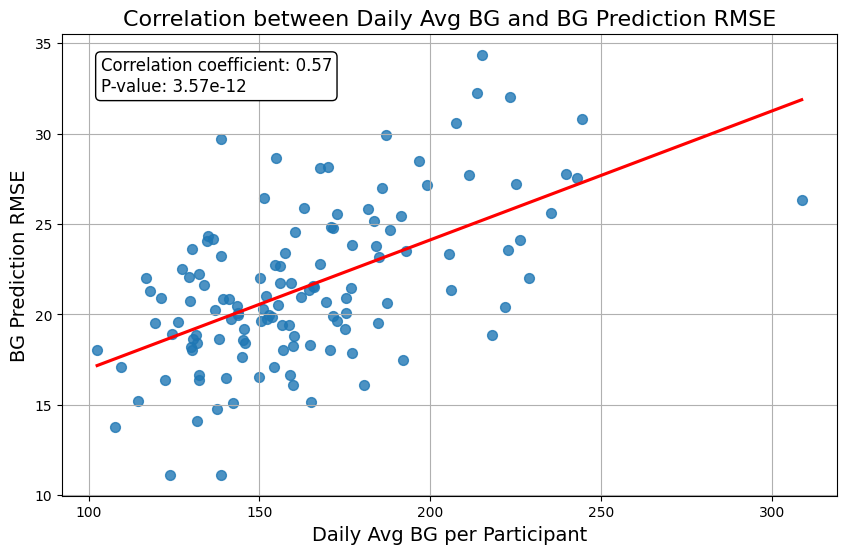

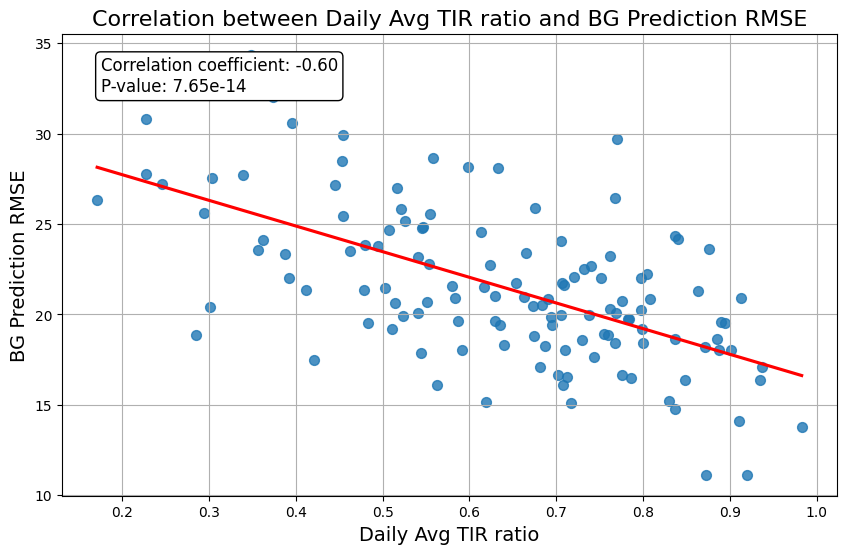

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming mixed_df is already defined as shown in the question

# Scatter plot for AVE CGM (daily avg) & RMSE_mixed
plt.figure(figsize=(10, 6))
sns.regplot(x='AVE CGM (daily avg)', y='RMSE_own', data=mixed_df, ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(mixed_df['AVE CGM (daily avg)'], mixed_df['RMSE_mixed'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('Daily Avg BG per Participant', fontsize=14)
plt.ylabel('BG Prediction RMSE', fontsize=14)
plt.title('Correlation between Daily Avg BG and BG Prediction RMSE', fontsize=16)
plt.grid(True)
plt.show()

# Scatter plot for TIR ratio & RMSE_mixed
plt.figure(figsize=(10, 6))
sns.regplot(x='TIR ratio', y='RMSE_mixed', data=mixed_df, ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(mixed_df['TIR ratio'], mixed_df['RMSE_mixed'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('Daily Avg TIR ratio', fontsize=14)
plt.ylabel('BG Prediction RMSE', fontsize=14)
plt.title('Correlation between Daily Avg TIR ratio and BG Prediction RMSE', fontsize=16)
plt.grid(True)
plt.show()

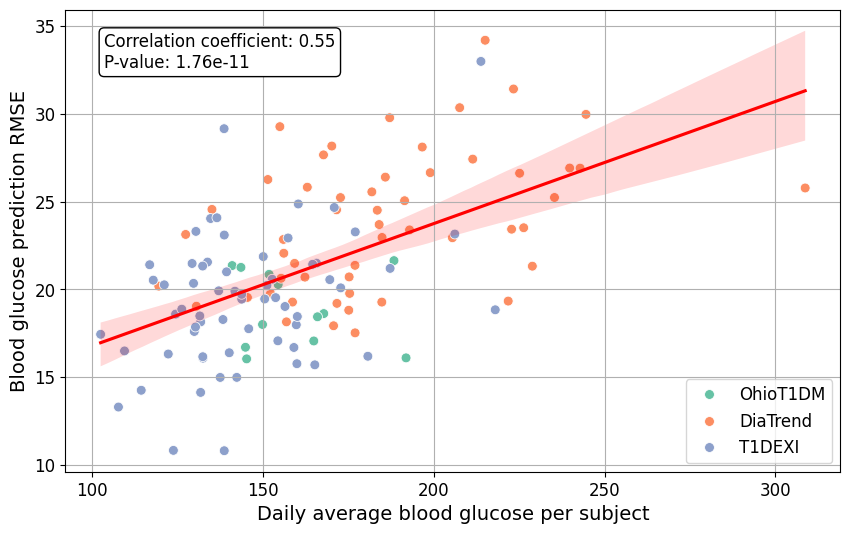

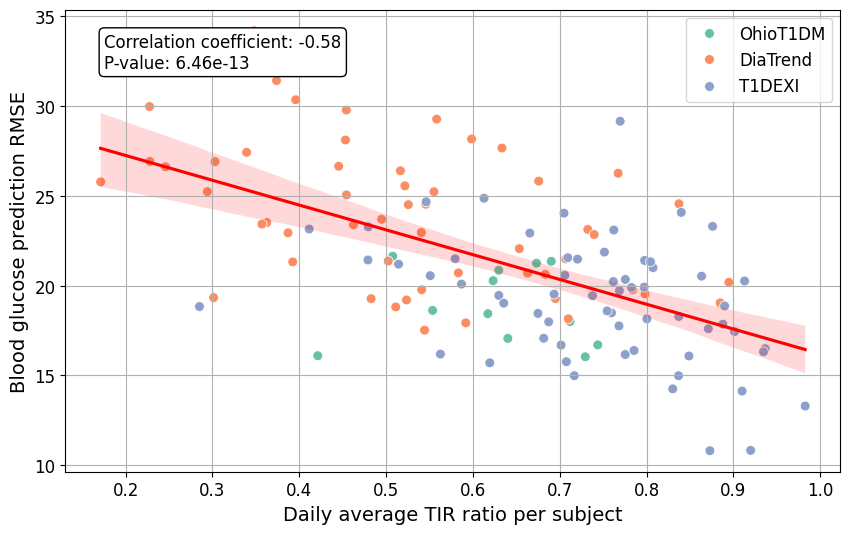

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming mixed_df is already defined and includes a 'Dataset' column

# Scatter plot for AVE CGM (daily avg) & RMSE_own
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVE CGM (daily avg)', y='RMSE_own', hue='Dataset', data=mixed_df, palette='Set2', s=50)
sns.regplot(x='AVE CGM (daily avg)', y='RMSE_own', data=mixed_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(mixed_df['AVE CGM (daily avg)'], mixed_df['RMSE_own'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('Daily average blood glucose per subject', fontsize=14)
plt.ylabel('Blood glucose prediction RMSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('Correlation between Daily Avg BG and BG Prediction RMSE', fontsize=16)
plt.grid(True)
# Place the legend in the lower right corner
plt.legend(loc='lower right', fontsize=12)
plt.show()

# Scatter plot for TIR ratio & RMSE_own
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TIR ratio', y='RMSE_own', hue='Dataset', data=mixed_df, palette='Set2', s=50)
sns.regplot(x='TIR ratio', y='RMSE_own', data=mixed_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(mixed_df['TIR ratio'], mixed_df['RMSE_own'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('Daily average TIR ratio per subject', fontsize=14)
plt.ylabel('Blood glucose prediction RMSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('Correlation between Daily Avg TIR ratio and BG Prediction RMSE', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

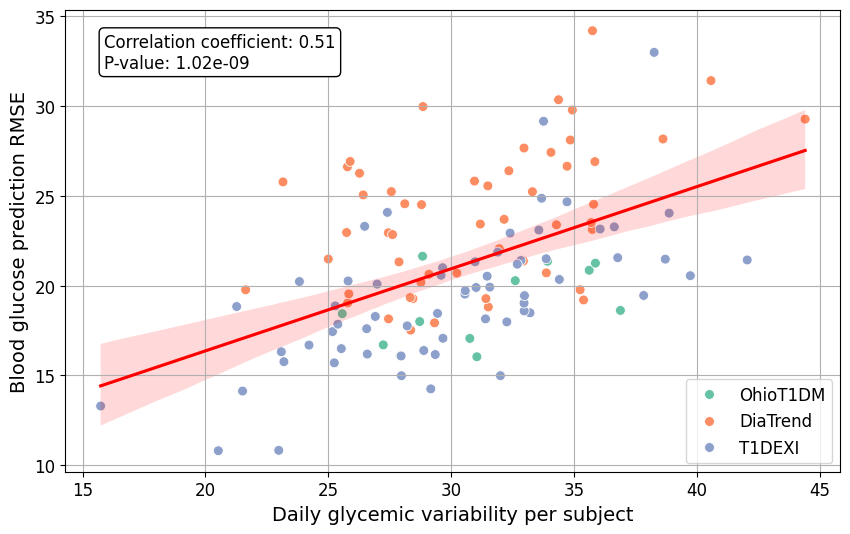

In [12]:
# Scatter plot for TIR ratio & RMSE_mixed
# plt.figure(figsize=(10, 6))
# sns.regplot(x='Gly var (daily std)', y='RMSE_mixed', data=mixed_df, ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# # Calculate correlation coefficient and p-value
# corr_coef, p_value = pearsonr(mixed_df['Gly var (daily std)'], mixed_df['RMSE_mixed'])

# # Annotate the plot with correlation coefficient and p-value
# plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
#              xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
#              horizontalalignment='left', verticalalignment='top',
#              bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# plt.xlabel('Daily Glycemic Variability', fontsize=14)
# plt.ylabel('BG Prediction RMSE', fontsize=14)
# plt.title('Correlation between Daily Glycemic Variability and BG Prediction RMSE', fontsize=16)
# plt.grid(True)
# plt.show()

# Scatter plot for TIR ratio & RMSE_own
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gly var (daily std)', y='RMSE_own', hue='Dataset', data=mixed_df, palette='Set2', s=50)
sns.regplot(x='Gly var (daily std)', y='RMSE_own', data=mixed_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(mixed_df['Gly var (daily std)'], mixed_df['RMSE_own'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('Daily glycemic variability per subject', fontsize=14)
plt.ylabel('Blood glucose prediction RMSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('Correlation between Daily Glycemic Variability and BG Prediction RMSE', fontsize=16)
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)
plt.show()

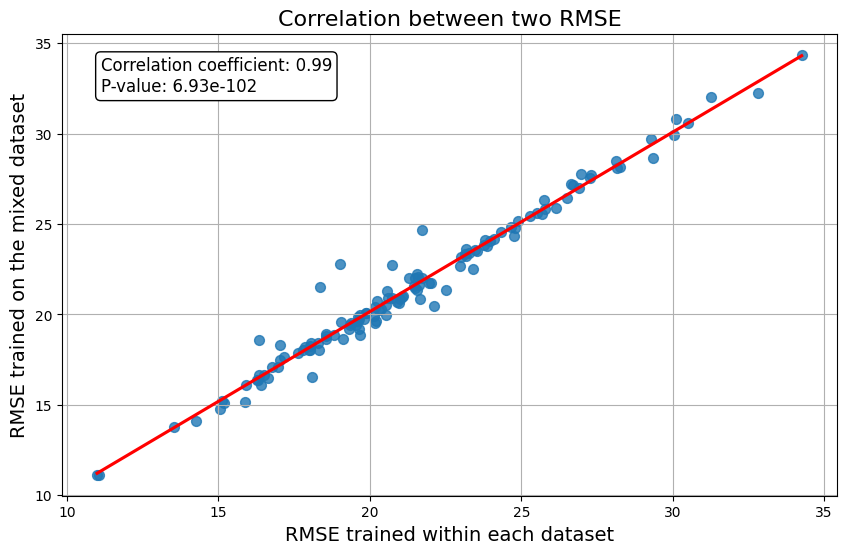

In [12]:
# Scatter plot for TIR ratio & RMSE_mixed
plt.figure(figsize=(10, 6))
sns.regplot(x='RMSE_own', y='RMSE_mixed', data=mixed_df, ci=None, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(mixed_df['RMSE_own'], mixed_df['RMSE_mixed'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.2e}',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.xlabel('RMSE trained within each dataset', fontsize=14)
plt.ylabel('RMSE trained on the mixed dataset', fontsize=14)
plt.title('Correlation between two RMSE', fontsize=16)
plt.grid(True)
plt.show()

In [3]:
import pandas as pd

# Define the path to the Excel file
excel_file_path = "./Result Table (1).xlsx"

# Load the "demographics" sheet into a DataFrame
demographics_df = pd.read_excel(excel_file_path, sheet_name="demographics")

# Display the DataFrame
print(demographics_df)

      Dataset  Patient_id Gender    Age   Race  AVE CGM (daily avg)  \
0    OhioT1DM         540      M  20–40    NaN             141.0050   
1    OhioT1DM         544      M  40–60    NaN             164.8916   
2    OhioT1DM         552      M  20–40    NaN             145.2375   
3    OhioT1DM         567      F  20–40    NaN             167.8130   
4    OhioT1DM         584      M  40–60    NaN             149.8922   
..        ...         ...    ...    ...    ...                  ...   
123    T1DEXI        1683      F     20  WHITE             143.7827   
124    T1DEXI        1689      F     50  WHITE             172.7788   
125    T1DEXI        1695      F     25  WHITE             126.2572   
126    T1DEXI        1722      F     29  WHITE             160.0753   
127    T1DEXI        1726      F     27  WHITE             159.9530   

     Gly var (daily std)  TIR ratio  T1DEXI Exercise Group  \
0               33.91281   0.690298                    NaN   
1               30.7538

In [2]:
demographics_df

,Dataset,Patient_id,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,BMI,HbA1C
0,OhioT1DM,540,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,NaN,544,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,NaN,552,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,NaN,567,F,20–40,NaN,167.8130,36.87849,0.553600,NaN,PUMP,NaN,NaN
4,NaN,584,M,40–60,NaN,149.8922,28.71523,0.711924,NaN,PUMP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123,NaN,1683,F,20,WHITE,143.7827,30.56774,0.768782,NaN,MDI,NaN,NaN
124,NaN,1689,F,50,WHITE,172.7788,26.98128,0.586899,NaN,MDI,NaN,NaN
125,NaN,1695,F,25,WHITE,126.2572,25.27653,0.889945,NaN,CLOSED LOOP,NaN,NaN
126,NaN,1722,F,29,WHITE,160.0753,29.43964,0.674923,NaN,PUMP,NaN,NaN


In [3]:
excel_file_path = "./Result Table (1).xlsx"
cross_dataset = pd.read_excel(excel_file_path, sheet_name="cross_dataset")

In [5]:
max(cross_dataset["Li_retrained"])

46.61611

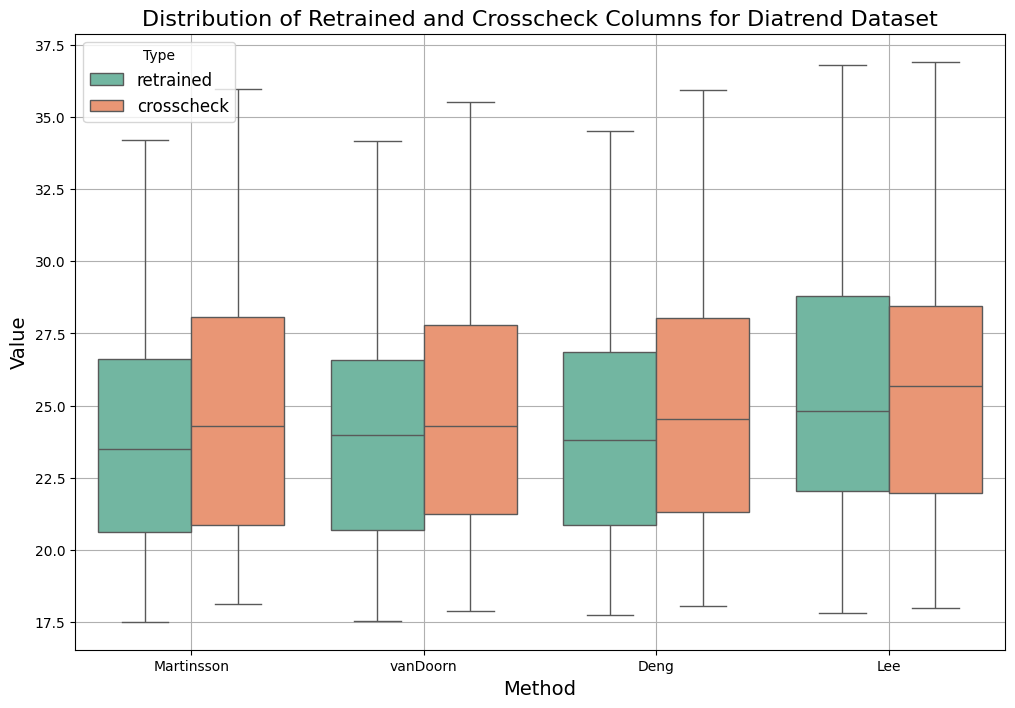

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to focus on the Diatrend dataset
diatrend_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = diatrend_df.melt(id_vars=['SubjectID'], 
                             value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                         'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                         'Deng_retrained', 'Deng_crosscheck', 
                                         'Lee_retrained', 'Lee_crosscheck'], 
                             var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

plt.xlabel('Method', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Retrained and Crosscheck Columns for Diatrend Dataset', fontsize=16)
plt.legend(title='Type', fontsize=12)
plt.grid(True)
plt.show()

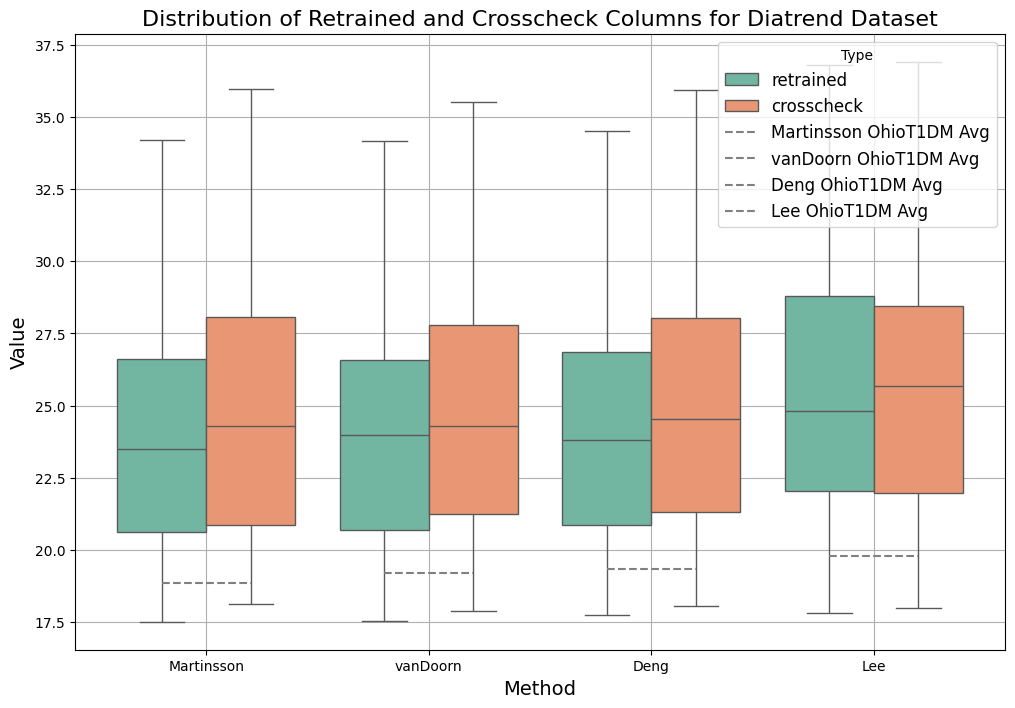

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the column
cross_dataset.rename(columns={'Lee_crosschek': 'Lee_crosscheck'}, inplace=True)

# Filter the dataframe to focus on the Diatrend dataset
diatrend_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = diatrend_df.melt(id_vars=['SubjectID'], 
                             value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                         'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                         'Deng_retrained', 'Deng_crosscheck', 
                                         'Lee_retrained', 'Lee_crosscheck'], 
                             var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='gray', label=f'{method} OhioT1DM Avg')

plt.xlabel('Method', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Retrained and Crosscheck Columns for Diatrend Dataset', fontsize=16)
plt.legend(title='Type', fontsize=12)
plt.grid(True)
plt.show()

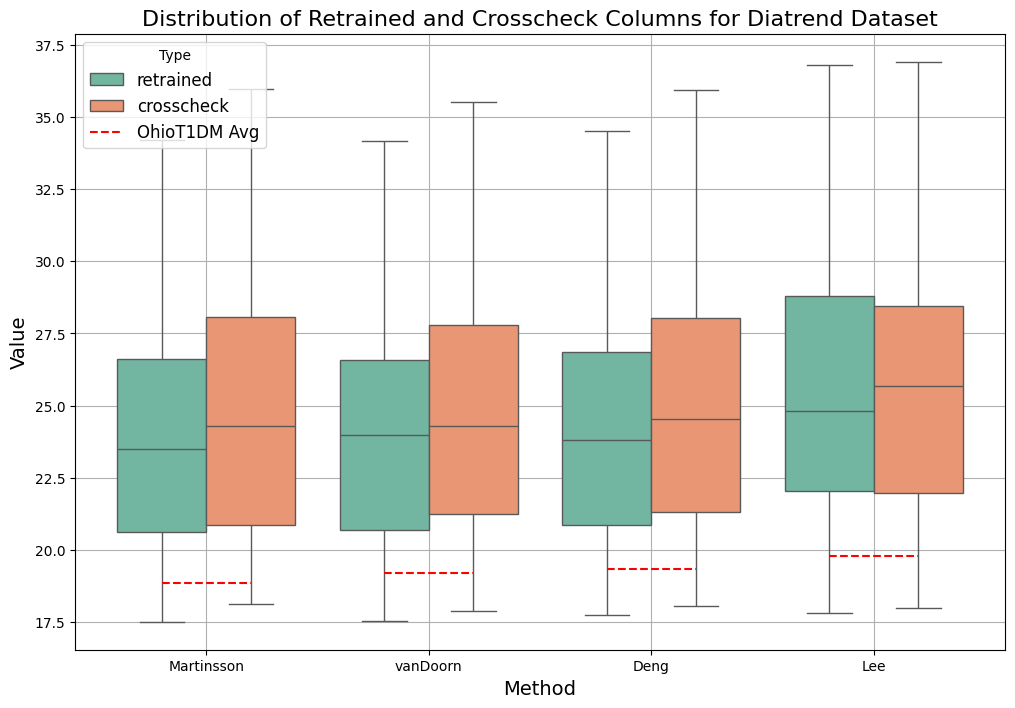

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the column
cross_dataset.rename(columns={'Lee_crosschek': 'Lee_crosscheck'}, inplace=True)

# Filter the dataframe to focus on the Diatrend dataset
diatrend_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = diatrend_df.melt(id_vars=['SubjectID'], 
                             value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                         'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                         'Deng_retrained', 'Deng_crosscheck', 
                                         'Lee_retrained', 'Lee_crosscheck'], 
                             var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short red dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='red')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label='OhioT1DM Avg'))
plt.legend(handles=handles, title='Type', fontsize=12, loc='upper left')


# plt.legend(handles=handles, title='Type', fontsize=12)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Retrained and Crosscheck Columns for Diatrend Dataset', fontsize=16)
plt.grid(True)
plt.show()

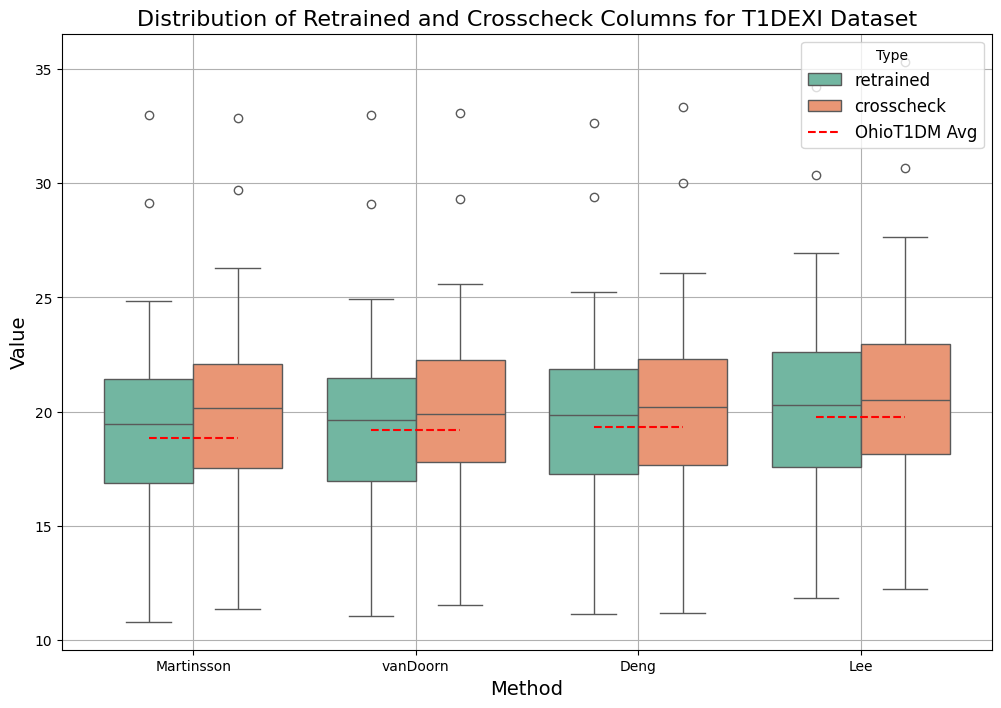

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the column
cross_dataset.rename(columns={'Lee_crosschek': 'Lee_crosscheck'}, inplace=True)

# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'T1DEXI']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short red dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='red')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label='OhioT1DM Avg'))
plt.legend(handles=handles, title='Type', fontsize=12)

plt.xlabel('Method', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Distribution of Retrained and Crosscheck Columns for T1DEXI Dataset', fontsize=16)
plt.grid(True)
plt.show()

C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\1929175324.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D',
C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\1929175324.py:33: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D',
C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\1929175324.py:33: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D',


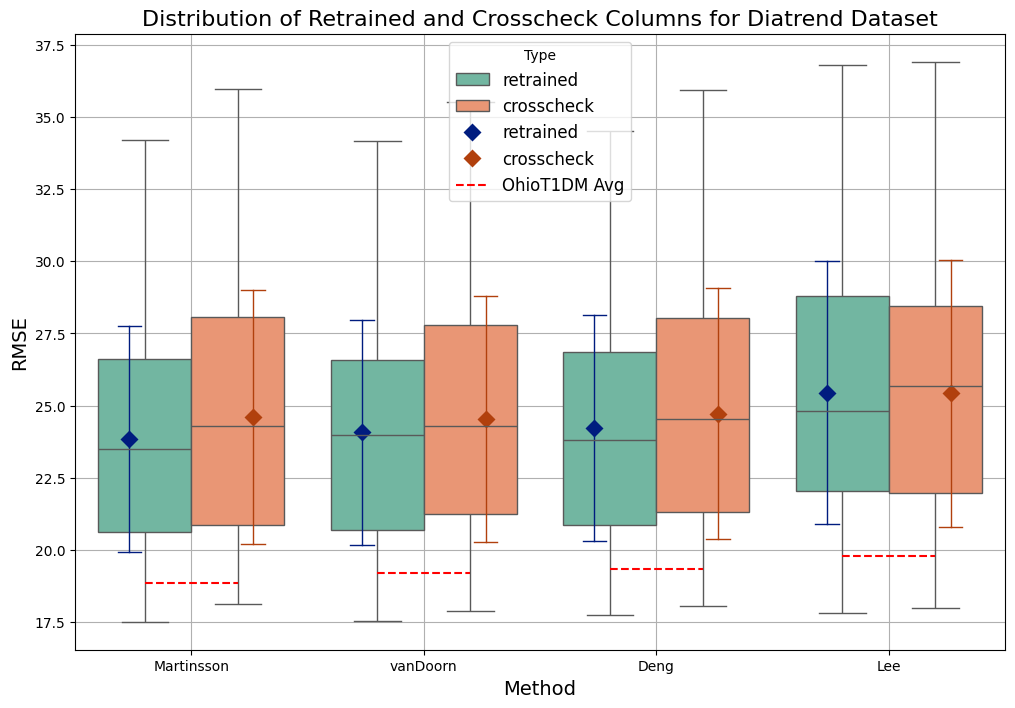

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to focus on the Diatrend dataset
diatrend_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = diatrend_df.melt(id_vars=['SubjectID'], 
                             value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                         'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                         'Deng_retrained', 'Deng_crosscheck', 
                                         'Lee_retrained', 'Lee_crosscheck'], 
                             var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short red dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='red')

# Overlay mean and standard deviation
sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D', 
              capsize=0.1, errwidth=1, palette='dark', ci='sd')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label='OhioT1DM Avg'))
plt.legend(handles=handles, title='Type', fontsize=12)

plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Distribution of Retrained and Crosscheck Columns for Diatrend Dataset', fontsize=16)
plt.grid(True)
plt.show()

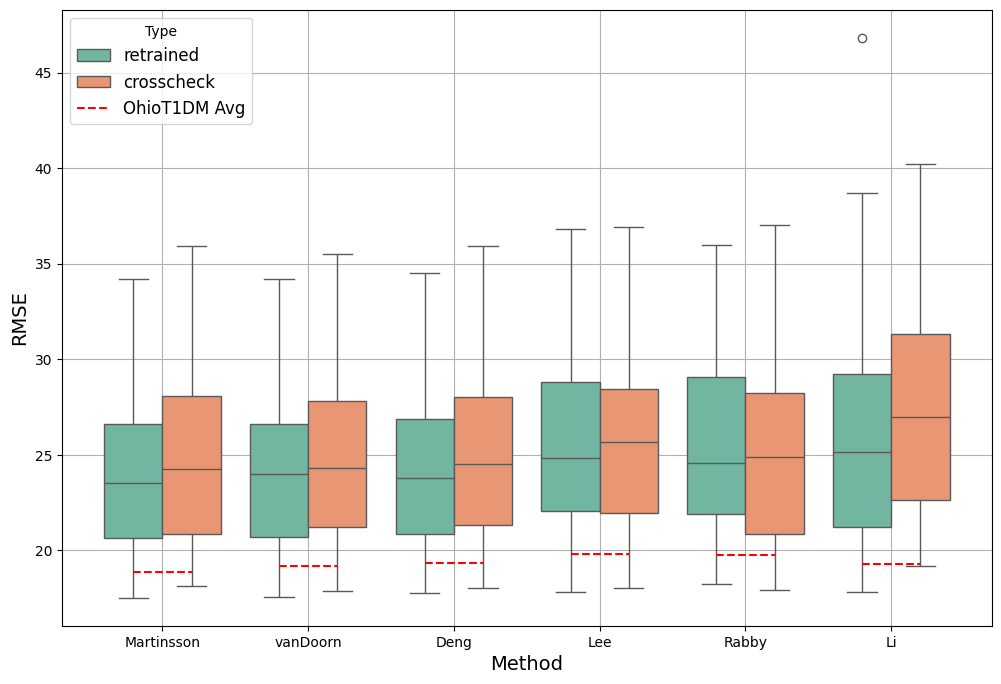

In [4]:
# Filter the dataframe to focus on the Diatrend dataset
diatrend_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = diatrend_df.melt(id_vars=['SubjectID'], 
                             value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                         'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                         'Deng_retrained', 'Deng_crosscheck', 
                                         'Lee_retrained', 'Lee_crosscheck',
                                         'Rabby_retrained', 'Rabby_crosscheck',
                                         'Li_retrained', 'Li_crosscheck'], 
                             var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short red dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee', 'Rabby', 'Li']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='red')

# Overlay mean and standard deviation
# sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D', 
#               capsize=0.1, errwidth=1, palette='dark', ci='sd')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label='OhioT1DM Avg'))
plt.legend(handles=handles, title='Type', fontsize=12)

plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
# plt.title('Distribution of Retrained and Crosscheck Columns for Diatrend Dataset', fontsize=16)
plt.grid(True)
plt.show()

In [13]:
# Filter the dataframe to focus on the Diatrend dataset
diatrend_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']
diatrend_df

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,Rabby_retrained,Li_retrained,Rabby_crosscheck,Li_crosscheck,baseline
12,DiaTrend,1,18.80873,19.13378,19.59301,19.54198,19.69,19.63,20.14,19.86,22.600592,21.238804,23.588362,21.212545,21.465626
13,DiaTrend,2,23.68829,23.93995,23.97056,24.04073,24.19,24.40,26.14,25.86,28.253923,26.192910,27.741310,26.745935,30.302852
14,DiaTrend,3,19.19975,19.21385,20.38079,20.32959,20.34,20.19,23.73,23.77,24.038021,21.068716,23.914675,21.952991,24.967872
15,DiaTrend,4,23.12433,23.08490,23.99909,22.57126,23.66,22.41,22.72,22.24,24.373476,21.992750,25.030367,23.522629,26.807455
16,DiaTrend,5,17.92425,18.14811,18.05625,18.14772,18.23,18.36,18.65,18.42,22.452543,20.032156,21.209072,19.912327,22.745774
17,DiaTrend,6,20.62933,20.85967,20.83570,20.57545,20.86,20.65,20.84,20.70,22.799328,21.324259,22.834501,21.858168,23.699917
18,DiaTrend,7,23.50519,24.76318,23.96383,25.55840,23.75,25.66,24.67,27.28,30.718050,30.014477,30.268005,29.798650,30.598360
19,DiaTrend,8,34.18384,35.95150,34.18009,35.50620,34.52,35.93,36.80,36.91,38.852806,37.917927,39.302850,40.191837,42.497647
20,DiaTrend,9,24.50409,25.47910,24.77044,25.24760,25.19,25.55,25.70,25.42,27.768540,26.508247,27.114557,27.352705,28.788378
21,DiaTrend,10,30.34284,31.83522,30.43855,31.15727,30.58,31.53,31.66,31.53,34.191870,33.664820,34.620934,34.681730,36.100574


In [16]:
# List of methods to test
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee', 'Rabby', 'Li']

# Perform t-tests and print p-values
for method in methods:
    retrained_values = diatrend_df[f'{method}_retrained']
    crosscheck_values = diatrend_df[f'{method}_crosscheck']
    t_stat, p_value = ttest_ind(retrained_values, crosscheck_values)
    
    print(f'T-test for {method}: p-value = {p_value:.4f}')
    if p_value < 0.05:
        print(f'The difference between {method}_retrained and {method}_crosscheck is significant.')
    else:
        print(f'The difference between {method}_retrained and {method}_crosscheck is not significant.')

T-test for Martinsson: p-value = 0.3561
The difference between Martinsson_retrained and Martinsson_crosscheck is not significant.
T-test for vanDoorn: p-value = 0.5747
The difference between vanDoorn_retrained and vanDoorn_crosscheck is not significant.
T-test for Deng: p-value = 0.5477
The difference between Deng_retrained and Deng_crosscheck is not significant.
T-test for Lee: p-value = 0.9715
The difference between Lee_retrained and Lee_crosscheck is not significant.
T-test for Rabby: p-value = 0.6900
The difference between Rabby_retrained and Rabby_crosscheck is not significant.
T-test for Li: p-value = 0.4344
The difference between Li_retrained and Li_crosscheck is not significant.


C:\Users\baiyi\AppData\Local\Temp\ipykernel_13212\1574951974.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D',
C:\Users\baiyi\AppData\Local\Temp\ipykernel_13212\1574951974.py:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D',
C:\Users\baiyi\AppData\Local\Temp\ipykernel_13212\1574951974.py:36: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D',


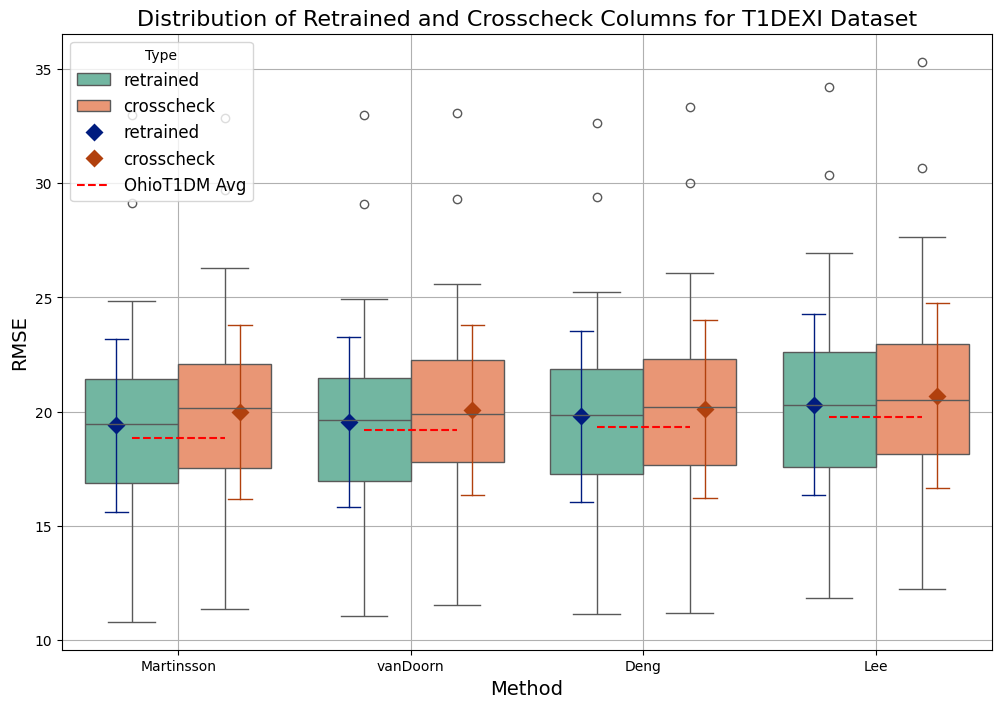

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename the column
cross_dataset.rename(columns={'Lee_crosschek': 'Lee_crosscheck'}, inplace=True)

# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'T1DEXI']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short red dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='red')

# Overlay mean and standard deviation
sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D', 
              capsize=0.1, errwidth=1, palette='dark', ci='sd')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label='OhioT1DM Avg'))
plt.legend(handles=handles, title='Type', fontsize=12)

plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Distribution of Retrained and Crosscheck Columns for T1DEXI Dataset', fontsize=16)
plt.grid(True)
plt.show()

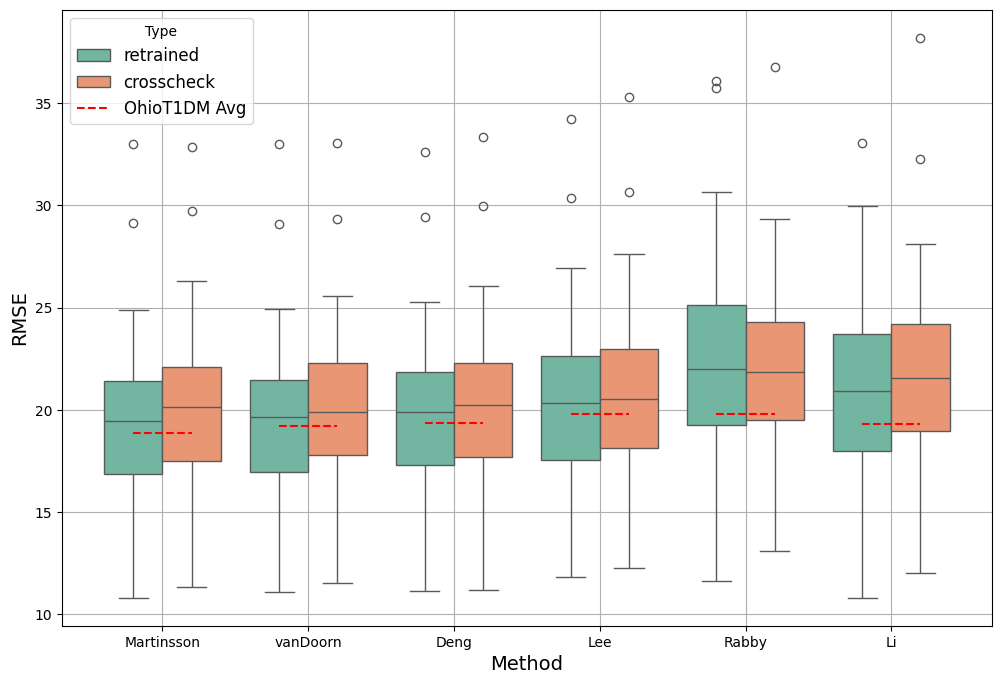

In [6]:
# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'T1DEXI']

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck',
                                       'Rabby_retrained', 'Rabby_crosscheck',
                                       'Li_retrained', 'Li_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Calculate the average values for OhioT1DM dataset
ohiot1dm_df = cross_dataset[cross_dataset['Dataset'] == 'OhioT1DM']
ohiot1dm_means = ohiot1dm_df[['Martinsson_retrained', 'vanDoorn_retrained', 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained']].mean()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Method', y='Value', hue='Type', data=melted_df, palette='Set2')

# Add short red dashed segments for the average values of OhioT1DM
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee', 'Rabby', 'Li']
for i, method in enumerate(methods):
    avg_value = ohiot1dm_means[f'{method}_retrained']
    plt.plot([i - 0.2, i + 0.2], [avg_value, avg_value], linestyle='--', color='red')

# Overlay mean and standard deviation
# sns.pointplot(x='Method', y='Value', hue='Type', data=melted_df, dodge=0.532, join=False, markers='D', 
#               capsize=0.1, errwidth=1, palette='dark', ci='sd')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label='OhioT1DM Avg'))
plt.legend(handles=handles, title='Type', fontsize=12)

plt.xlabel('Method', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
# plt.title('Distribution of Retrained and Crosscheck Columns for T1DEXI Dataset', fontsize=16)
plt.grid(True)
plt.show()

In [15]:
# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'T1DEXI']
# List of methods to test
methods = ['Martinsson', 'vanDoorn', 'Deng', 'Lee', 'Rabby', 'Li']

# Perform t-tests and print p-values
for method in methods:
    retrained_values = t1dexi_df[f'{method}_retrained']
    crosscheck_values = t1dexi_df[f'{method}_crosscheck']
    t_stat, p_value = ttest_ind(retrained_values, crosscheck_values)
    
    print(f'T-test for {method}: p-value = {p_value:.4f}')
    if p_value < 0.05:
        print(f'The difference between {method}_retrained and {method}_crosscheck is significant.')
    else:
        print(f'The difference between {method}_retrained and {method}_crosscheck is not significant.')

T-test for Martinsson: p-value = 0.3844
The difference between Martinsson_retrained and Martinsson_crosscheck is not significant.
T-test for vanDoorn: p-value = 0.4241
The difference between vanDoorn_retrained and vanDoorn_crosscheck is not significant.
T-test for Deng: p-value = 0.6161
The difference between Deng_retrained and Deng_crosscheck is not significant.
T-test for Lee: p-value = 0.5928
The difference between Lee_retrained and Lee_crosscheck is not significant.
T-test for Rabby: p-value = 0.8252
The difference between Rabby_retrained and Rabby_crosscheck is not significant.
T-test for Li: p-value = 0.3895
The difference between Li_retrained and Li_crosscheck is not significant.


C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\3626428430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)


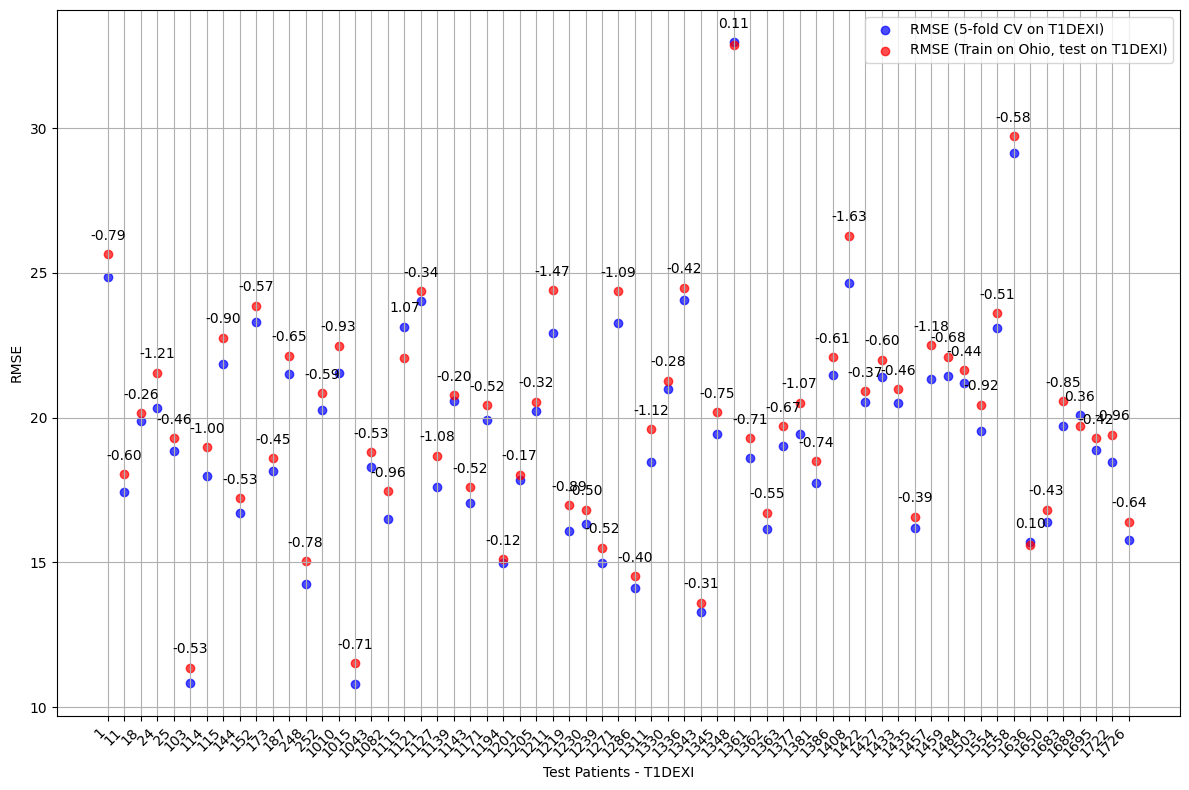

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'T1DEXI']
t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck',
                                       'Rabby_retrained', 'Rabby_crosscheck',
                                       'Li_retrained', 'Li_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Filter for Martinsson methods
martinsson_df = melted_df[melted_df['Method'].isin(['Martinsson'])]

# Pivot the dataframe to get the required columns
pivot_df = martinsson_df.pivot(index='SubjectID', columns='Type', values='Value').reset_index()

# Sort by SubjectID and convert to string
pivot_df = pivot_df.sort_values(by='SubjectID')
pivot_df['SubjectID'] = pivot_df['SubjectID'].astype(str)

# Calculate the delta (difference) between RMSE columns
pivot_df['Delta'] = pivot_df['retrained'] - pivot_df['crosscheck']

# Create a scatter plot comparing RMSE and RMSE_from_ohio
plt.figure(figsize=(12, 8))
plt.scatter(pivot_df['SubjectID'], pivot_df['retrained'], label='RMSE (5-fold CV on T1DEXI)', color='blue', alpha=0.7)
plt.scatter(pivot_df['SubjectID'], pivot_df['crosscheck'], label='RMSE (Train on Ohio, test on T1DEXI)', color='red', alpha=0.7)

# Add delta values as text annotations
for i in range(len(pivot_df)):
    plt.text(pivot_df['SubjectID'][i], max(pivot_df['retrained'][i], pivot_df['crosscheck'][i]) + 0.5,
             f"{pivot_df['Delta'][i]:.2f}", fontsize=10, ha='center')

# Labels and legend
plt.xlabel("Test Patients - T1DEXI")
plt.ylabel("RMSE")

# Adjust x-ticks to avoid crowding
plt.xticks(ticks=np.arange(len(pivot_df)), labels=pivot_df['SubjectID'], rotation=45, ha='right')

plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/BG_Rep_Gen/gen_transformer_t1dexi.png')

# Show the plot
plt.show()

In [18]:
# Calculate the number of rows where Delta > 0
num_delta_greater_than_zero = (pivot_df['Delta'] > 0).sum()

# Calculate the number of rows where Delta < 0
num_delta_less_than_zero = (pivot_df['Delta'] < 0).sum()

print(f"Number of Delta > 0: {num_delta_greater_than_zero}")
print(f"Number of Delta < 0: {num_delta_less_than_zero}")

Number of Delta > 0: 4
Number of Delta < 0: 59


C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\603466797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)


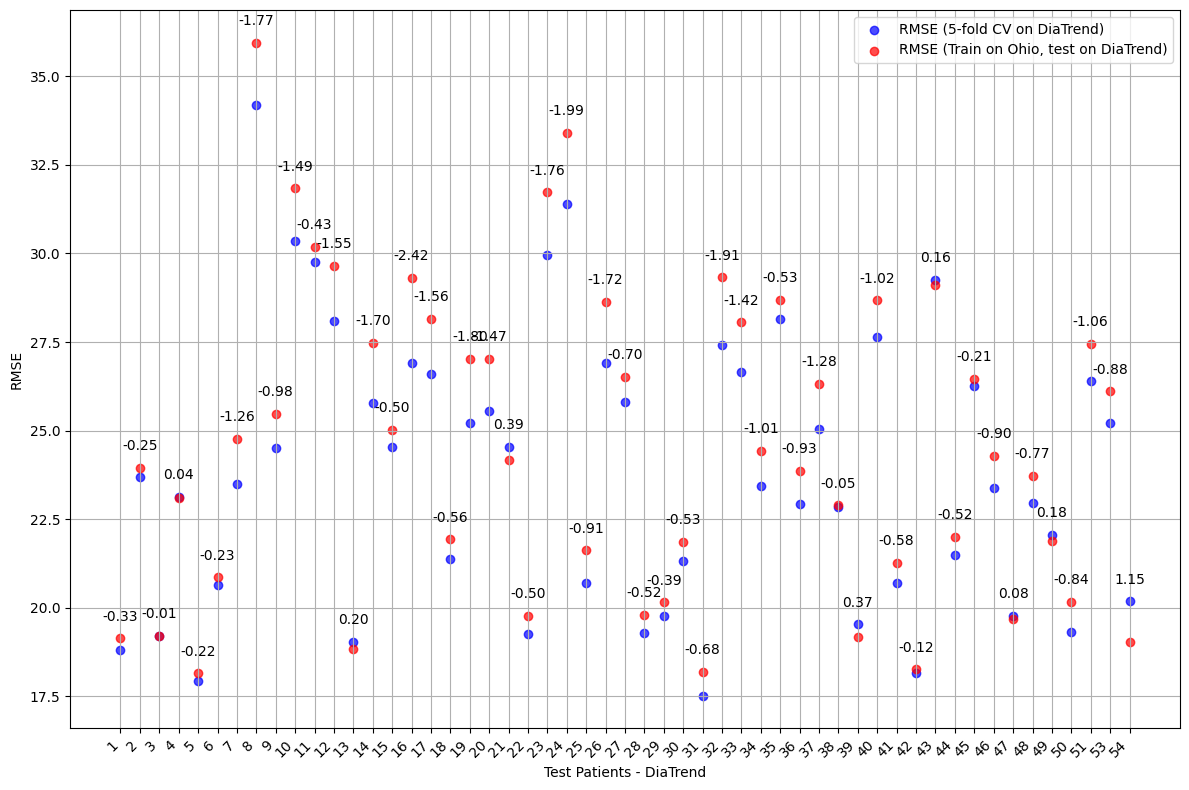

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']
t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck',
                                       'Rabby_retrained', 'Rabby_crosscheck',
                                       'Li_retrained', 'Li_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Filter for Martinsson methods
martinsson_df = melted_df[melted_df['Method'].isin(['Martinsson'])]

# Pivot the dataframe to get the required columns
pivot_df = martinsson_df.pivot(index='SubjectID', columns='Type', values='Value').reset_index()

# Sort by SubjectID and convert to string
pivot_df = pivot_df.sort_values(by='SubjectID')
pivot_df['SubjectID'] = pivot_df['SubjectID'].astype(str)

# Calculate the delta (difference) between RMSE columns
pivot_df['Delta'] = pivot_df['retrained'] - pivot_df['crosscheck']

# Create a scatter plot comparing RMSE and RMSE_from_ohio
plt.figure(figsize=(12, 8))
plt.scatter(pivot_df['SubjectID'], pivot_df['retrained'], label='RMSE (5-fold CV on DiaTrend)', color='blue', alpha=0.7)
plt.scatter(pivot_df['SubjectID'], pivot_df['crosscheck'], label='RMSE (Train on Ohio, test on DiaTrend)', color='red', alpha=0.7)

# Add delta values as text annotations
for i in range(len(pivot_df)):
    plt.text(pivot_df['SubjectID'][i], max(pivot_df['retrained'][i], pivot_df['crosscheck'][i]) + 0.5,
             f"{pivot_df['Delta'][i]:.2f}", fontsize=10, ha='center')

# Labels and legend
plt.xlabel("Test Patients - DiaTrend")
plt.ylabel("RMSE")

# Adjust x-ticks to avoid crowding
plt.xticks(ticks=np.arange(len(pivot_df)), labels=pivot_df['SubjectID'], rotation=45, ha='right')

plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/BG_Rep_Gen/gen_transformer_t1dexi.png')

# Show the plot
plt.show()

In [20]:
# Calculate the number of rows where Delta > 0
num_delta_greater_than_zero = (pivot_df['Delta'] > 0).sum()

# Calculate the number of rows where Delta < 0
num_delta_less_than_zero = (pivot_df['Delta'] < 0).sum()

print(f"Number of Delta > 0: {num_delta_greater_than_zero}")
print(f"Number of Delta < 0: {num_delta_less_than_zero}")

Number of Delta > 0: 8
Number of Delta < 0: 45


C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\1648766553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)


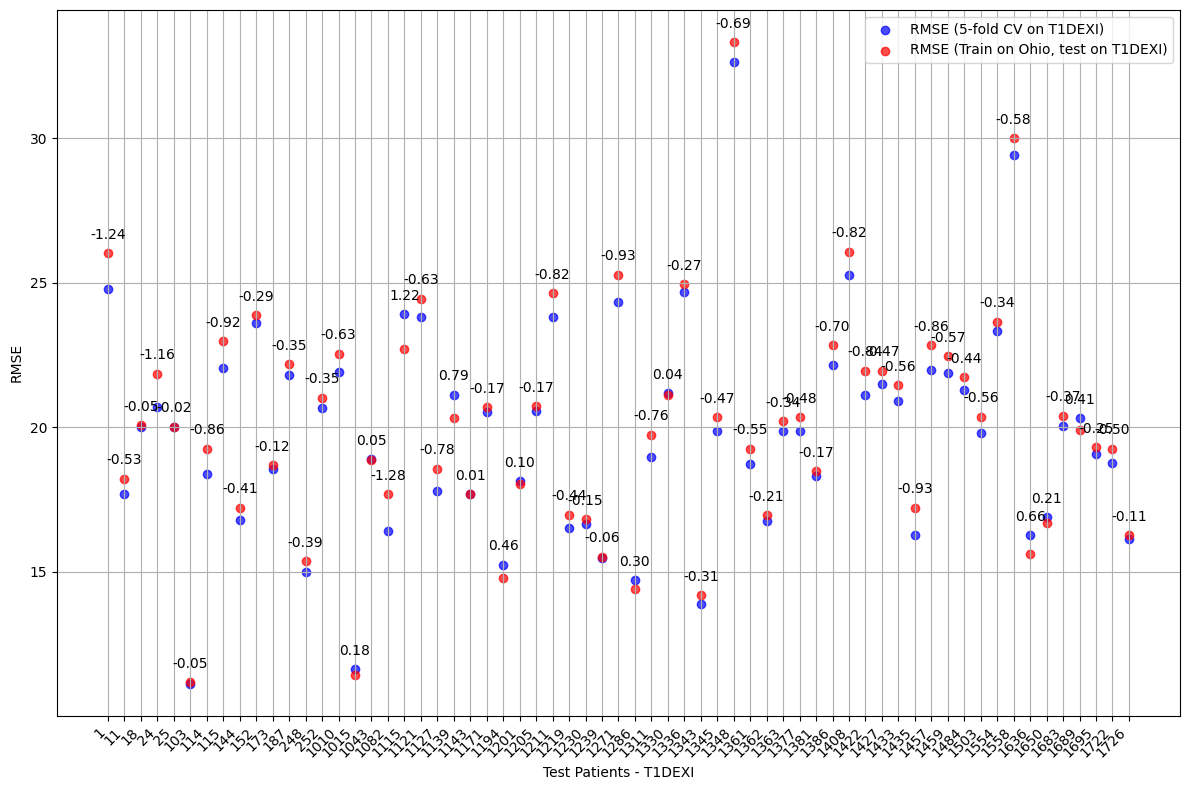

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'T1DEXI']
t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck',
                                       'Rabby_retrained', 'Rabby_crosscheck',
                                       'Li_retrained', 'Li_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Filter for Martinsson methods
martinsson_df = melted_df[melted_df['Method'].isin(['Deng'])]

# Pivot the dataframe to get the required columns
pivot_df = martinsson_df.pivot(index='SubjectID', columns='Type', values='Value').reset_index()

# Sort by SubjectID and convert to string
pivot_df = pivot_df.sort_values(by='SubjectID')
pivot_df['SubjectID'] = pivot_df['SubjectID'].astype(str)

# Calculate the delta (difference) between RMSE columns
pivot_df['Delta'] = pivot_df['retrained'] - pivot_df['crosscheck']

# Create a scatter plot comparing RMSE and RMSE_from_ohio
plt.figure(figsize=(12, 8))
plt.scatter(pivot_df['SubjectID'], pivot_df['retrained'], label='RMSE (5-fold CV on T1DEXI)', color='blue', alpha=0.7)
plt.scatter(pivot_df['SubjectID'], pivot_df['crosscheck'], label='RMSE (Train on Ohio, test on T1DEXI)', color='red', alpha=0.7)

# Add delta values as text annotations
for i in range(len(pivot_df)):
    plt.text(pivot_df['SubjectID'][i], max(pivot_df['retrained'][i], pivot_df['crosscheck'][i]) + 0.5,
             f"{pivot_df['Delta'][i]:.2f}", fontsize=10, ha='center')

# Labels and legend
plt.xlabel("Test Patients - T1DEXI")
plt.ylabel("RMSE")

# Adjust x-ticks to avoid crowding
plt.xticks(ticks=np.arange(len(pivot_df)), labels=pivot_df['SubjectID'], rotation=45, ha='right')

plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/BG_Rep_Gen/gen_transformer_t1dexi.png')

# Show the plot
plt.show()

In [26]:
# Calculate the number of rows where Delta > 0
num_delta_greater_than_zero = (pivot_df['Delta'] > 0).sum()

# Calculate the number of rows where Delta < 0
num_delta_less_than_zero = (pivot_df['Delta'] < 0).sum()

print(f"Number of Delta > 0: {num_delta_greater_than_zero}")
print(f"Number of Delta < 0: {num_delta_less_than_zero}")

Number of Delta > 0: 12
Number of Delta < 0: 51


C:\Users\baiyi\AppData\Local\Temp\ipykernel_29864\4029248452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)


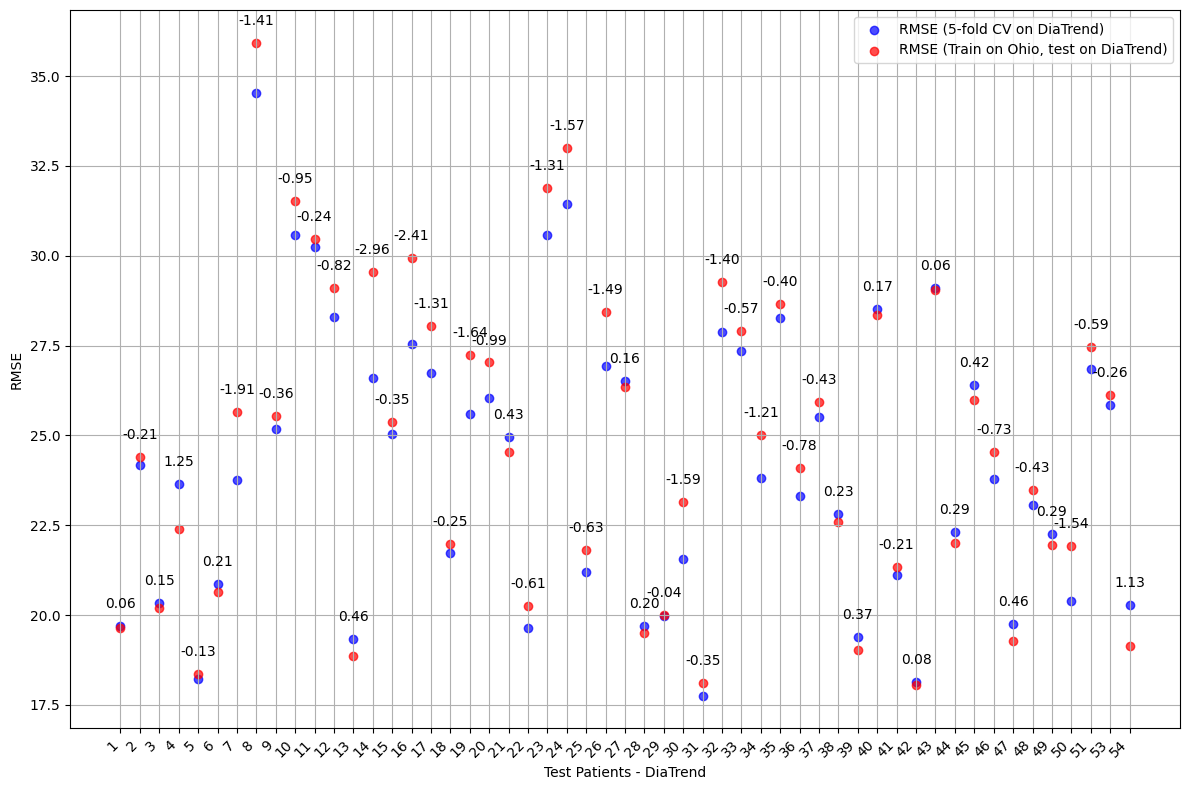

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe to focus on the T1DEXI dataset
t1dexi_df = cross_dataset[cross_dataset['Dataset'] == 'DiaTrend']
t1dexi_df['SubjectID'] = t1dexi_df['SubjectID'].astype(int)

# Melt the dataframe to have a long-form dataframe suitable for seaborn
melted_df = t1dexi_df.melt(id_vars=['SubjectID'], 
                           value_vars=['Martinsson_retrained', 'Martinsson_crosscheck', 
                                       'vanDoorn_retrained', 'vanDoorn_crosscheck', 
                                       'Deng_retrained', 'Deng_crosscheck', 
                                       'Lee_retrained', 'Lee_crosscheck',
                                       'Rabby_retrained', 'Rabby_crosscheck',
                                       'Li_retrained', 'Li_crosscheck'], 
                           var_name='Method_Type', value_name='Value')

# Split the 'Method_Type' column into 'Method' and 'Type'
melted_df[['Method', 'Type']] = melted_df['Method_Type'].str.split('_', expand=True)

# Filter for Martinsson methods
martinsson_df = melted_df[melted_df['Method'].isin(['Deng'])]

# Pivot the dataframe to get the required columns
pivot_df = martinsson_df.pivot(index='SubjectID', columns='Type', values='Value').reset_index()

# Sort by SubjectID and convert to string
pivot_df = pivot_df.sort_values(by='SubjectID')
pivot_df['SubjectID'] = pivot_df['SubjectID'].astype(str)

# Calculate the delta (difference) between RMSE columns
pivot_df['Delta'] = pivot_df['retrained'] - pivot_df['crosscheck']

# Create a scatter plot comparing RMSE and RMSE_from_ohio
plt.figure(figsize=(12, 8))
plt.scatter(pivot_df['SubjectID'], pivot_df['retrained'], label='RMSE (5-fold CV on DiaTrend)', color='blue', alpha=0.7)
plt.scatter(pivot_df['SubjectID'], pivot_df['crosscheck'], label='RMSE (Train on Ohio, test on DiaTrend)', color='red', alpha=0.7)

# Add delta values as text annotations
for i in range(len(pivot_df)):
    plt.text(pivot_df['SubjectID'][i], max(pivot_df['retrained'][i], pivot_df['crosscheck'][i]) + 0.5,
             f"{pivot_df['Delta'][i]:.2f}", fontsize=10, ha='center')

# Labels and legend
plt.xlabel("Test Patients - DiaTrend")
plt.ylabel("RMSE")

# Adjust x-ticks to avoid crowding
plt.xticks(ticks=np.arange(len(pivot_df)), labels=pivot_df['SubjectID'], rotation=45, ha='right')

plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/BG_Rep_Gen/gen_transformer_t1dexi.png')

# Show the plot
plt.show()

In [28]:
# Calculate the number of rows where Delta > 0
num_delta_greater_than_zero = (pivot_df['Delta'] > 0).sum()

# Calculate the number of rows where Delta < 0
num_delta_less_than_zero = (pivot_df['Delta'] < 0).sum()

print(f"Number of Delta > 0: {num_delta_greater_than_zero}")
print(f"Number of Delta < 0: {num_delta_less_than_zero}")

Number of Delta > 0: 18
Number of Delta < 0: 35
